<a href="https://colab.research.google.com/github/Razbolt/Neural-Network/blob/greg/Neural_Network_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.1 Import the libraries we need and load the dataset using Keras

In [10]:
import numpy as np
import pandas as pd
import keras
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler


In [3]:
# Use keras to import MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


##1.2 Data inspection and preparation

Before procesing, we need to check the MNIST Data.
First we plot one sample image to see what our input data look like

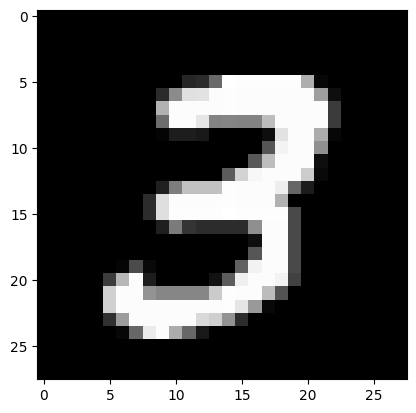

3


In [5]:
# Plot a sample image
sample = 7
image = X_train[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()
print(y_train[sample])

Then we print the size of the arrays we have created just to make sure they are as expected

In [6]:
print ("shape of X_train {}".format(X_train.shape))
print ("shape of X_test {}".format(X_test.shape))
print ("shape of y_train {}".format(y_train.shape))
print ("shape of y_test {}".format(y_test.shape))


shape of X_train (60000, 28, 28)
shape of X_test (10000, 28, 28)
shape of y_train (60000,)
shape of y_test (10000,)


Finally we print one data sample to see what it is like

In [8]:
X_train[7]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43,
        105, 255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,
          0,   0],
       [  

We can see that our input is a 28x28 array of integers with values in the range 0 to 255. These correspond to the input image size which is 28x28 pixels and the values represent the colour intensity of each pixel in the image in the greyscale range. 0 is black, 255 is white and the values in between are shades of grey. This can also be confirmed by the image that we have plotted above.   

In order to feed the data into our NN we need to "flatten" the 28x28 array into one dimension array containing all 784 elements and preserving the total number of input samples. We print the resulting size.

In [13]:
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

print ("shape of X_train_flat {}".format(X_train_flat.shape))
print ("shape of X_test_flat {}".format(X_test_flat.shape))
X_train_flat[7]

shape of X_train_flat (60000, 784)
shape of X_test_flat (10000, 784)


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  38,  43, 105, 255, 253,
       253, 253, 253, 253, 174,   6,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  43, 139, 224, 22

Since all our features are integer values that range from 0 to 255 it is not absolutely necessary to standardize our input data. However we will perform a simple scaling of the data by dividing all values by the max value 255

In [18]:
X_train_scaled = X_train_flat/255
X_train_scaled[7]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

#2.1 Build Neural Network

In [ ]:
def init_params():

  #input layer's weigths
  W1 = np.random.uniform(-0.5, 0.5, (16,784))
  b1 = np.zeros((16,1))




  #Hidden layer's weight
  W2 = np.random.uniform(-0.5,0.5, (16,16))
  b2 = np.zeros((16,1))


  # Second Hidden layer' weight
  W3 = np.random.uniform(-0.5,0.5 ,(10,16))  # Weights are still to big
  b3 = np.zeros((10,1))


  return W1,b1,W2,b2,W3,b3



W1,b1,W2,b2,W3,b3 = init_params()


#1.2 Build Activation functions and Forward Propagation

In [ ]:
def ReLU(Z):

  return np.maximum(0,Z)


def softmax(Z): # CHECK IT !!!

  # for one examples is (np.exp(Z) / np.sum( np.exp(Z)))

    Z_exp = np.exp(Z - np.max(Z, axis=0))
    sum_Z_exp = np.sum(Z_exp, axis=0)
    softmax_output = Z_exp / sum_Z_exp

    return softmax_output

def sigmoid(Z):

  return 1 / 1+ np.exp(-Z)





def forward_prop(X,W1,b1,W2,b2,W3,b3):
  #Forward propagation with 3 layered neural network

  #Initialize  Z
  #Since X is shape as (6000,784) and our W1 is shape as (16,784) in order to dot product we need to take Transpose of X

  Z1 = W1.dot(X.T)+ b1
  #Activation with ReLU to given linear regression to feed neural network
  A1 = ReLU(Z1)

  Z2 = W2.dot(A1) + b2


  A2 = ReLU(Z2)

  Z3 = W3.dot(A2) + b3
  #At the end softmax  the output layer to have a probabilistic values
  A3 = softmax(Z3)

  return A1,A2,A3

A1,A2,A3 = forward_prop(X_train,W1,b1,W2,b2,W3,b3)

print(A3)

[[0.00679114 0.00527258 0.0658074  ... 0.00207419 0.00600942 0.03091759]
 [0.01790551 0.28869534 0.05381954 ... 0.18655483 0.14435255 0.18302996]
 [0.78716232 0.30405957 0.36980117 ... 0.50645333 0.02556571 0.22413396]
 ...
 [0.0109231  0.03390429 0.05191376 ... 0.04565613 0.09377314 0.06274774]
 [0.00242549 0.00778729 0.02485256 ... 0.00833378 0.00270395 0.09929324]
 [0.02089471 0.00800702 0.0968669  ... 0.00419734 0.00102753 0.06981688]]


#1.3 Back-Propagation with One-hot and derivative of activaton functions

In [ ]:
def one_hot(Y): # CHECK IT !!
  num_classes = np.max(Y) + 1

  one_hot = np.zeros((Y.size,num_classes))
  one_hot[np.arange(Y.size), Y] = 1

  return one_hot.T

def derivative_ReLU(Z):
  #Do we need to check between 0-1 ?
  return Z > 0


def backward_prop(X, Y, W1, b1, W2, b2, W3, b3, A1, A2, A3): # CHECK IT !!!!

  m = Y.size
  #One hot encoded to see each labels in matrix as 1
  Y = one_hot(Y)

  #Derivate of cost function with respect to z3
  dZ3 = A3 - Y
  dW3 = (1/m) * dZ3.dot(A2.T)
  dB3 = (1/m) * np.sum(dZ3,axis = 1,keepdims=True)

  #Derivate for second hidden layer
  dA2 = np.dot(W3.T,dZ3)
  dZ2 =  dA2  * derivative_ReLU(A2)
  dW2 = (1/ m) * dZ2.dot(A1.T)
  dB2 = (1/m) * np.sum(dZ2,axis =1,keepdims=True)

  #Derivate for first hidden layer

  dA1 = np.dot(W2.T,dZ2)
  dZ1 = dA1 * derivative_ReLU(A1)
  dW1 = (1/m) * dZ1.dot(X)
  dB1 =(1/m) * np.sum(dZ1, axis = 1,keepdims=True)

  return dW1,dB1,dW2,dB2,dW3,dB3

#1.3 Update the Gradient

In [ ]:
learning_rate = 0.1
epochs =  1000

def update_gradient(dW1,db1,dW2,db2,dW3,db3,W1,b1,W2,b2,W3,b3,learning_rate):

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3

    return W1,b1,W2,b2,W3,b3


#1.4 Try in given epochs time to see the changes

In [ ]:
def accuracy_score(A,Y):
    size = Y.size
    predict = np.argmax(A,0)

    correct = np.sum(predict == Y)

    accuracy = correct / size

    return accuracy


#print(predictions.max)
#print(y_train)
#print(np.sum(y_train == predictions))
#print(y_train.size)


In [ ]:

for epoch in range(epochs):
   # Forward propagation
   A1, A2, A3 = forward_prop(X_train, W1, b1, W2, b2, W3, b3)

   #Backward propagation
   dW1, db1, dW2, db2, dW3, db3 = backward_prop(X_train, y_train, W1, b1, W2, b2, W3, b3, A1, A2, A3)

   #Updating gradients
   W1,b1,W2,b2,W3,b3 = update_gradient(dW1,db1,dW2,db2,dW3,db3,W1,b1,W2,b2,W3,b3,learning_rate)



   if epoch % 20 == 0:
    acc =accuracy_score(A3,y_train)
    print(f'The accuracy in {epoch} is {acc}')


The accuracy in 0 is 0.6655
The accuracy in 20 is 0.7005333333333333
The accuracy in 40 is 0.72825
The accuracy in 60 is 0.7502833333333333
The accuracy in 80 is 0.7692
The accuracy in 100 is 0.7851666666666667
The accuracy in 120 is 0.7992333333333334
The accuracy in 140 is 0.81045
The accuracy in 160 is 0.8194833333333333
The accuracy in 180 is 0.8268333333333333
The accuracy in 200 is 0.8329166666666666
The accuracy in 220 is 0.8385333333333334
The accuracy in 240 is 0.843
The accuracy in 260 is 0.8265666666666667
The accuracy in 280 is 0.8520166666666666
The accuracy in 300 is 0.8557333333333333
The accuracy in 320 is 0.8584833333333334
The accuracy in 340 is 0.86105
The accuracy in 360 is 0.86335
The accuracy in 380 is 0.8658833333333333
The accuracy in 400 is 0.86815
The accuracy in 420 is 0.8708166666666667
The accuracy in 440 is 0.8726833333333334
The accuracy in 460 is 0.87495
The accuracy in 480 is 0.87665
The accuracy in 500 is 0.8784666666666666
The accuracy in 520 is 0.880